# Background


My goal of this notebook is to see if I can extend the work done in V01 by identifying a DB where the atlas is labeled.

This is currently working and this notebook **shows how to generate and apply mask to the data**. 

I found the database here:
 - [NeuroMouse Project](http://phm.utoronto.ca/~jeffh/surgical.htm)
 - [Back to Mouse Atlas Variational Mouse Brain Atlas](http://localhost:8888/notebooks/notebooks/Segmentation/Dataset%20-%20Mouse%20Brain%20and%20Labels%20V02.ipynb) This is the other toronto based atlas.  hopefully the labels here are accurate.
 

# Imports

In [1]:
import nibabel as nib  
import numpy
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [91]:
import scipy.misc

# Functions

In [2]:
def loadMNC(filepath):
    img = nib.load(filepath)
    data = img.get_data()
    return data

In [3]:
def showSlice(data):
    plt.set_cmap("gray")
    plt.imshow(data)

In [16]:
def getLabelInfo(labelArray,index):
    try:
        print(labelArray[index])
    except:
        print("{} is too large the there are only {} labels including 0 index".format(index,len(labelArray)-1))
    

# Parameters

In [7]:
# Directory locations
pathBrain = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas.mnc"
pathLabels = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas_labelling.mnc"
pathLabelInfo = "C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//129SV_atlas_labelling_names.txt"

sliceOfInterest = 24

# Reading File

Read the label informaiton and place it in an array for easy viewing later

In [9]:
labelInfo = []

f = open(pathLabelInfo, "r") 
for line in f: 
    labelInfo.append(line)
#     print line 

In [18]:
getLabelInfo(labelInfo,42)

60 UD5



There are some nodes that do not have labels so keep track of these as well just in case

In [19]:
dataBrain = loadMNC(pathBrain)
dataLabels = loadMNC(pathLabels)

In [20]:
dataBrain.shape

(141L, 274L, 210L)

In [21]:
dataLabels.shape

(141L, 274L, 210L)

So we see that the two shapes are the same and we can continue.

# Show Slice

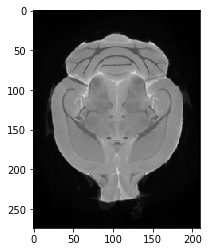

In [30]:
brainSlice = 80
showSlice(dataBrain[brainSlice,:,:])

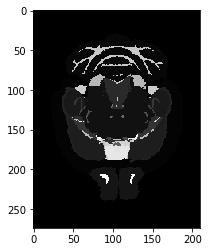

In [31]:
labelSlice = 80
showSlice(dataLabels[labelSlice,:,:])

In [32]:
np.max(dataLabels[labelSlice,:,:])

60.0

In [33]:
labelSliceImage = dataLabels[labelSlice,:,:]

In [41]:
a = labelSliceImage.ravel()

In [58]:
unraveledImage = labelSliceImage.ravel()

(array([  3.30210000e+04,   4.80900000e+03,   4.71000000e+03,
          0.00000000e+00,   4.38100000e+03,   2.02600000e+03,
          1.22700000e+03,   2.46900000e+03,   5.58000000e+02,
          3.10000000e+01,   8.54000000e+02,   1.79000000e+02,
          4.85000000e+02,   8.80000000e+01,   0.00000000e+00,
          0.00000000e+00,   4.60000000e+01,   3.90000000e+01,
          0.00000000e+00,   5.40000000e+01,   0.00000000e+00,
          0.00000000e+00,   4.20000000e+01,   0.00000000e+00,
          0.00000000e+00,   2.30000000e+01,   1.30000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.75000000e+02,   7.50000000e+01,
          7.80000000e+01,   6.40000000e+01,   8.70000000e+02,
        

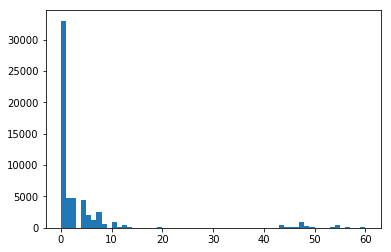

In [59]:
plt.hist(unraveledImage, bins=60, range=(0,60))

This looks all right it seems.  Let us create a mask now using this information.  Let us use two in this case.  So make everything zero except for 2.

In [60]:
labelSliceImageMask = np.copy(labelSliceImage)

In [64]:
labelSliceImageMask[np.where(labelSliceImage==2)] = 2
labelSliceImageMask[np.where(labelSliceImage!=2)] = 0

In [65]:
unraveledlabelSliceImageMask = labelSliceImageMask.ravel()

(array([ 52830.,      0.,   4710.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  5

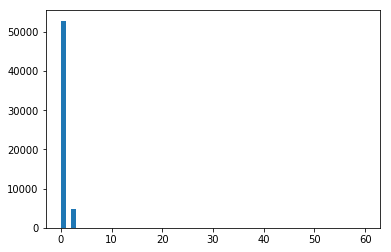

In [66]:
plt.hist(unraveledlabelSliceImageMask, bins=60, range=(0,60))

Now let us image this

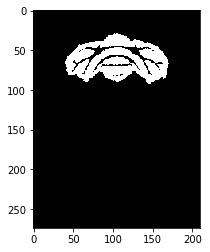

In [71]:
showSlice(labelSliceImageMask)

Alright this looks perfect.

# Segmentation

Crude segmentation when we have the labels:
1. Obtain label slice and data slice
2. create mask of the label
3. multiply mask and data
4. store new masked data
5. repeat for all slices

- dataBrain = variable containing the data
- dataLabels = varible containg the labels

In [78]:
dataBrainSegmented = np.zeros(dataBrain.shape)
areaInd = 2

# looping paramters
# this will be the cerebellum
sliceInd = 80

# obtain working slice
currentDataSlice = np.copy(dataBrain[sliceInd,:,:])
currentLabelSlice = np.copy(dataLabels[sliceInd,:,:])

# create the masks
currentLabelSlice[np.where(currentLabelSlice!=areaInd)] = 0
currentLabelSlice[np.where(currentLabelSlice==areaInd)] = 1

# apply mask
maskedData = currentLabelSlice * currentDataSlice

# store mask in the volumetric data

Text(0.5,1,'Segmented MR Scan')

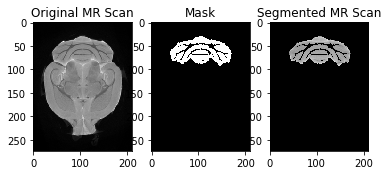

In [81]:
plt.subplot(1,3,1)
showSlice(currentDataSlice)
plt.title('Original MR Scan')
plt.subplot(1,3,2)
showSlice(currentLabelSlice)
plt.title('Mask')
plt.subplot(1,3,3)
showSlice(maskedData)
plt.title('Segmented MR Scan')

This looks very promising so let us apply this to the entire volumetric data 

In [93]:
numSlice,xdim,ydim = dataBrain.shape
dataBrainSegmented = np.zeros(dataBrain.shape)
areaInd = 2
outDir = 'C://Cerebral//_MarioSandBox//DB//medicalHolography//Animal Brains//UofTLabeledData//SegmentedCerebellum//'

for sliceInd in xrange(numSlice):
    print('Now applying mask to slice {}'.format(sliceInd))
    # looping paramters
    # this will be the cerebellum
    # sliceInd = 80

    # obtain working slice
    currentDataSlice = np.copy(dataBrain[sliceInd,:,:])
    currentLabelSlice = np.copy(dataLabels[sliceInd,:,:])

    # create the masks
    currentLabelSlice[np.where(currentLabelSlice!=areaInd)] = 0
    currentLabelSlice[np.where(currentLabelSlice==areaInd)] = 1

    # apply mask
    maskedData = currentLabelSlice * currentDataSlice

    # store mask in the volumetric data
    dataBrainSegmented[sliceInd,:,:] = maskedData
    
    scipy.misc.imsave(outDir+'{}.jpg'.format(sliceInd), maskedData)

Now applying mask to slice 0
Now applying mask to slice 1
Now applying mask to slice 2
Now applying mask to slice 3
Now applying mask to slice 4
Now applying mask to slice 5
Now applying mask to slice 6
Now applying mask to slice 7
Now applying mask to slice 8
Now applying mask to slice 9
Now applying mask to slice 10
Now applying mask to slice 11
Now applying mask to slice 12
Now applying mask to slice 13
Now applying mask to slice 14
Now applying mask to slice 15
Now applying mask to slice 16
Now applying mask to slice 17
Now applying mask to slice 18
Now applying mask to slice 19
Now applying mask to slice 20
Now applying mask to slice 21
Now applying mask to slice 22
Now applying mask to slice 23
Now applying mask to slice 24
Now applying mask to slice 25
Now applying mask to slice 26
Now applying mask to slice 27
Now applying mask to slice 28
Now applying mask to slice 29
Now applying mask to slice 30
Now applying mask to slice 31
Now applying mask to slice 32
Now applying mask to

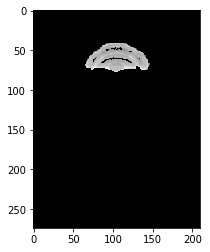

In [90]:
showSlice(dataBrainSegmented[100,:,:])